After creating more features and adding them to the hero dataset, I am going to re-run models that I already ran in the first models.ipynb notebook, as well as maybe test out some other models too.   

Since I have added in as many features that I think were feasible with the current data that I have and is available, I will see if adjusting which features are used affects model performance also. 



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

hero_data = pd.read_csv("hero_data_with_map_mode_winrates.csv")

hero_data.head()

,player_id,hero_name,role,timePlayed_value,matchesWinPct_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,...,Hell's Heaven,Krakoa,Midtown,Royal Palace,Spider-Islands,Symbiotic Surface,Yggdrasill Path,Convergence,Convoy,Domination
0,VP Sypeh,Gambit,strategist,10.385762,0.691358,48.6,4.075556,9.626667,881.0,2983.0,...,56.461653,56.461653,1.000000,56.461653,56.461653,56.461653,56.461653,1.000000,1.000000,0.000000
1,VP Sypeh,Invisible Woman,strategist,4.102634,0.639344,18.3,4.962500,11.475000,1294.0,3169.0,...,0.500000,0.666667,1.000000,56.461653,1.000000,1.000000,56.461653,0.666667,1.000000,0.714286
2,VP Sypeh,Emma Frost,vanguard,0.354180,0.714286,1.4,3.363636,4.545455,2404.0,0.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653
3,VP Sypeh,Loki,strategist,1.963736,0.932203,11.8,5.400000,13.400000,957.0,2267.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,1.000000,1.000000,1.000000,1.000000,1.000000
4,VP Sypeh,Adam Warlock,strategist,0.615783,0.533333,3.0,2.750000,4.850000,1272.0,1596.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,1.000000


Re-Using model code from models.ipynb

In [2]:
#i cant just label it 1,2,3, because then the model might try to compare them numerically, 
#i need to make it so it chooses one value or another
#like if the role is duelist, then strategist and vanguard are both 0 and it will get rid of their variables 
def onehot_encode_roles(df):
    if df['role'] == 'strategist': 
        return pd.Series([1,0,0])
    elif df['role'] == 'duelist':
        return pd.Series([0,1,0])
    elif df['role'] == 'vanguard':
        return pd.Series([0,0,1])

hero_data[['role_strategist', 'role_duelist', 'role_vanguard']] = hero_data.apply(onehot_encode_roles, axis=1)
hero_data 


,player_id,hero_name,role,timePlayed_value,matchesWinPct_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,...,Royal Palace,Spider-Islands,Symbiotic Surface,Yggdrasill Path,Convergence,Convoy,Domination,role_strategist,role_duelist,role_vanguard
0,VP Sypeh,Gambit,strategist,10.385762,0.691358,48.6,4.075556,9.626667,881.0,2983.0,...,56.461653,56.461653,56.461653,56.461653,1.000000,1.000000,0.000000,1,0,0
1,VP Sypeh,Invisible Woman,strategist,4.102634,0.639344,18.3,4.962500,11.475000,1294.0,3169.0,...,56.461653,1.000000,1.000000,56.461653,0.666667,1.000000,0.714286,1,0,0
2,VP Sypeh,Emma Frost,vanguard,0.354180,0.714286,1.4,3.363636,4.545455,2404.0,0.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,0,0,1
3,VP Sypeh,Loki,strategist,1.963736,0.932203,11.8,5.400000,13.400000,957.0,2267.0,...,56.461653,56.461653,1.000000,1.000000,1.000000,1.000000,1.000000,1,0,0
4,VP Sypeh,Adam Warlock,strategist,0.615783,0.533333,3.0,2.750000,4.850000,1272.0,1596.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,1.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,DecaDonald,Loki,strategist,10.502265,0.572016,48.6,2.886207,7.500000,701.0,2287.0,...,56.461653,56.461653,56.461653,1.000000,1.000000,1.000000,0.000000,1,0,0
3953,DecaDonald,Invisible Woman,strategist,2.657516,0.336283,11.3,2.098901,5.571429,677.0,2592.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,0.000000,1,0,0
3954,DecaDonald,Rocket Raccoon,strategist,3.638904,0.590674,19.3,1.400000,6.410526,207.0,1988.0,...,56.461653,56.461653,56.461653,56.461653,0.000000,56.461653,1.000000,1,0,0
3955,DecaDonald,Venom,vanguard,0.448317,0.400000,2.5,2.117647,2.941176,1095.0,0.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,1.000000,0,0,1


In [3]:
from sklearn.model_selection import train_test_split
features = hero_data.columns.drop(['player_id', 'hero_name', 'role', 'matchesWinPct_value'])
X = hero_data[features]
y = hero_data['matchesWinPct_value']
#splitting to 90/10 train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler() #need to separate scalars to keep the x and y separate, in a sense making 2 scaler objects that can act on our data 
scaler_Y = MinMaxScaler()

X_scaled_values = scaler_X.fit_transform(X_train)

#problems with y not being able to be reshaped since its a series object not a df 
#Y_scaled_values = scaler_Y.fit_transform(y_train.values.reshape(-1,1)) #need to reshape the array to be 2-d in order for the function to work to make a numpy array

x_train_scaled_vals = X_scaled_values
#i shouldnt scale the y train values bc its a single output value
#y_train_scaled_vals = Y_scaled_values
y_train_scaled_vals = y_train

In [5]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
result = lm.fit(x_train_scaled_vals,y_train_scaled_vals)
print(result.intercept_)
print(result.coef_)

0.40339823475437675
[-7.41685122e-01  5.35992272e-01  1.26914046e+00  8.28972858e-01
 -1.64741925e-01 -2.20166127e-01  2.82317843e-02  2.80857112e-01
  4.79430152e-01 -8.45774820e-01  2.48816588e-01  3.35991621e-03
  8.43507035e-03  1.81793297e-02  1.51261654e-02  1.26983424e-02
  8.54953539e-03  1.26747507e-02  2.68483834e-03  1.32651767e-02
 -7.49400542e-16  5.91195662e-03  1.55468090e-02 -1.45846020e-03
 -3.70802349e-02 -2.46479202e-02 -2.52356770e-02  5.36612089e-02
 -1.64326485e-02 -3.72285604e-02]


In [6]:
X_test_all_cols = X_test.copy()
X_test_all_cols['player_id'] = hero_data.loc[X_test.index, 'player_id']
X_test_all_cols['hero_name'] = hero_data.loc[X_test.index, 'hero_name']
X_test_all_cols

,timePlayed_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,totalDamageTakenPerMinute_value,lastKills_value,totalMvp_value,totalSvp_value,...,Symbiotic Surface,Yggdrasill Path,Convergence,Convoy,Domination,role_strategist,role_duelist,role_vanguard,player_id,hero_name
149,4.068457,20.8,5.688172,7.010753,2054.0,0.0,2872.0,180,3,0,...,56.461653,56.461653,56.461653,56.461653,56.461653,0,0,1,Nеcrize,Emma Frost
1025,1.020680,5.5,5.194444,5.194444,2796.0,0.0,929.0,80,2,0,...,56.461653,56.461653,56.461653,0.500000,56.461653,0,1,0,happyhamster6,Moon Knight
2153,3.353423,14.4,2.422222,7.055556,781.0,2227.0,489.0,33,2,0,...,56.461653,56.461653,56.461653,56.461653,56.461653,1,0,0,Dinks,Loki
720,5.612147,29.8,3.639344,4.431694,2091.0,82.0,4686.0,232,4,2,...,56.461653,56.461653,56.461653,56.461653,56.461653,0,0,1,Unovvn,Groot
325,0.555147,2.5,2.777778,3.277778,1595.0,0.0,2383.0,15,0,0,...,56.461653,1.000000,56.461653,1.000000,56.461653,0,0,1,TreeMan.1,Magneto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,4.304796,23.3,3.777778,8.898148,991.0,2230.0,535.0,101,1,0,...,56.461653,56.461653,0.000000,56.461653,1.000000,1,0,0,MilleDidrik,Jeff The Land Shark
3884,0.388022,1.7,3.500000,3.750000,1621.0,0.0,4298.0,15,0,0,...,56.461653,1.000000,1.000000,1.000000,56.461653,0,0,1,斩尽杀绝,Groot
1345,0.253282,1.6,1.750000,2.312500,1334.0,0.0,1401.0,12,0,0,...,56.461653,56.461653,56.461653,56.461653,56.461653,0,1,0,Evil GomaKazi,Daredevil
69,1.722180,9.5,7.392857,8.821429,2019.0,0.0,3019.0,78,0,0,...,56.461653,56.461653,56.461653,56.461653,56.461653,0,0,1,energу,Magneto


In [7]:
x_Test_scaled = scaler_X.transform(X_test)

In [8]:
scaled_prediction_sk = lm.predict(x_Test_scaled)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, scaled_prediction_sk)
r2 = r2_score(y_test, scaled_prediction_sk)

print(mse)
print(mse**0.5)
print(r2)


0.03283350051878689
0.1812001669943681
0.31247910115895783


*****
Creating Visualizations for each model, by plotting y pred and y actual
*****

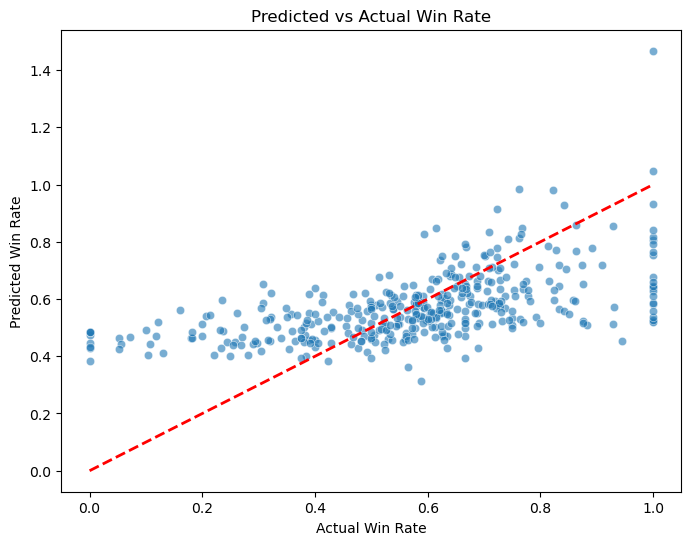

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=scaled_prediction_sk, alpha=0.6)

#reference line 
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Win Rate")
plt.ylabel("Predicted Win Rate")
plt.title("Predicted vs Actual Win Rate")
plt.show()


In [11]:
prediction_results = X_test.copy()
prediction_results['Predicted Win %'] = scaled_prediction_sk.flatten()
prediction_results['Actual Win %'] = y_test.values.flatten()

prediction_results.head()

,timePlayed_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,totalDamageTakenPerMinute_value,lastKills_value,totalMvp_value,totalSvp_value,...,Symbiotic Surface,Yggdrasill Path,Convergence,Convoy,Domination,role_strategist,role_duelist,role_vanguard,Predicted Win %,Actual Win %
149,4.068457,20.8,5.688172,7.010753,2054.0,0.0,2872.0,180,3,0,...,56.461653,56.461653,56.461653,56.461653,56.461653,0,0,1,0.771680,0.826923
1025,1.020680,5.5,5.194444,5.194444,2796.0,0.0,929.0,80,2,0,...,56.461653,56.461653,56.461653,0.500000,56.461653,0,1,0,0.633683,0.727273
2153,3.353423,14.4,2.422222,7.055556,781.0,2227.0,489.0,33,2,0,...,56.461653,56.461653,56.461653,56.461653,56.461653,1,0,0,0.553758,0.631944
720,5.612147,29.8,3.639344,4.431694,2091.0,82.0,4686.0,232,4,2,...,56.461653,56.461653,56.461653,56.461653,56.461653,0,0,1,0.668193,0.728188
325,0.555147,2.5,2.777778,3.277778,1595.0,0.0,2383.0,15,0,0,...,56.461653,1.000000,56.461653,1.000000,56.461653,0,0,1,0.521920,1.000000


In [12]:
prediction_results_with_ids = X_test_all_cols.copy()
prediction_results_with_ids['Predicted Win %'] = scaled_prediction_sk.flatten()
prediction_results_with_ids['Actual Win %'] = y_test.values.flatten()
prediction_results_with_ids

,timePlayed_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,totalDamageTakenPerMinute_value,lastKills_value,totalMvp_value,totalSvp_value,...,Convergence,Convoy,Domination,role_strategist,role_duelist,role_vanguard,player_id,hero_name,Predicted Win %,Actual Win %
149,4.068457,20.8,5.688172,7.010753,2054.0,0.0,2872.0,180,3,0,...,56.461653,56.461653,56.461653,0,0,1,Nеcrize,Emma Frost,0.771680,0.826923
1025,1.020680,5.5,5.194444,5.194444,2796.0,0.0,929.0,80,2,0,...,56.461653,0.500000,56.461653,0,1,0,happyhamster6,Moon Knight,0.633683,0.727273
2153,3.353423,14.4,2.422222,7.055556,781.0,2227.0,489.0,33,2,0,...,56.461653,56.461653,56.461653,1,0,0,Dinks,Loki,0.553758,0.631944
720,5.612147,29.8,3.639344,4.431694,2091.0,82.0,4686.0,232,4,2,...,56.461653,56.461653,56.461653,0,0,1,Unovvn,Groot,0.668193,0.728188
325,0.555147,2.5,2.777778,3.277778,1595.0,0.0,2383.0,15,0,0,...,56.461653,1.000000,56.461653,0,0,1,TreeMan.1,Magneto,0.521920,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,4.304796,23.3,3.777778,8.898148,991.0,2230.0,535.0,101,1,0,...,0.000000,56.461653,1.000000,1,0,0,MilleDidrik,Jeff The Land Shark,0.664563,0.613734
3884,0.388022,1.7,3.500000,3.750000,1621.0,0.0,4298.0,15,0,0,...,1.000000,1.000000,56.461653,0,0,1,斩尽杀绝,Groot,0.595784,0.823529
1345,0.253282,1.6,1.750000,2.312500,1334.0,0.0,1401.0,12,0,0,...,56.461653,56.461653,56.461653,0,1,0,Evil GomaKazi,Daredevil,0.462761,0.375000
69,1.722180,9.5,7.392857,8.821429,2019.0,0.0,3019.0,78,0,0,...,56.461653,56.461653,56.461653,0,0,1,energу,Magneto,0.768743,0.863158


*****
I want to test naive bayes. I want to see if I can classify data into not likely, likely, highly likely to win a match
*****

In [13]:
#need to split up the data and classify it based on win percentage ranges 
def classify_win_percentage(win_pct):
    if win_pct < 40:
        return 'Low likelihood'
    elif 40 <= win_pct < 60:
        return 'Medium likelihood'
    else:
        return 'High likelihood'

In [14]:
naive_bayes_heroes_df = hero_data.copy()
naive_bayes_heroes_df['Win_Likelihood'] = naive_bayes_heroes_df['matchesWinPct_value'].apply(classify_win_percentage)
naive_bayes_heroes_df

,player_id,hero_name,role,timePlayed_value,matchesWinPct_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,...,Spider-Islands,Symbiotic Surface,Yggdrasill Path,Convergence,Convoy,Domination,role_strategist,role_duelist,role_vanguard,Win_Likelihood
0,VP Sypeh,Gambit,strategist,10.385762,0.691358,48.6,4.075556,9.626667,881.0,2983.0,...,56.461653,56.461653,56.461653,1.000000,1.000000,0.000000,1,0,0,Low likelihood
1,VP Sypeh,Invisible Woman,strategist,4.102634,0.639344,18.3,4.962500,11.475000,1294.0,3169.0,...,1.000000,1.000000,56.461653,0.666667,1.000000,0.714286,1,0,0,Low likelihood
2,VP Sypeh,Emma Frost,vanguard,0.354180,0.714286,1.4,3.363636,4.545455,2404.0,0.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,0,0,1,Low likelihood
3,VP Sypeh,Loki,strategist,1.963736,0.932203,11.8,5.400000,13.400000,957.0,2267.0,...,56.461653,1.000000,1.000000,1.000000,1.000000,1.000000,1,0,0,Low likelihood
4,VP Sypeh,Adam Warlock,strategist,0.615783,0.533333,3.0,2.750000,4.850000,1272.0,1596.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,1.000000,1,0,0,Low likelihood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,DecaDonald,Loki,strategist,10.502265,0.572016,48.6,2.886207,7.500000,701.0,2287.0,...,56.461653,56.461653,1.000000,1.000000,1.000000,0.000000,1,0,0,Low likelihood
3953,DecaDonald,Invisible Woman,strategist,2.657516,0.336283,11.3,2.098901,5.571429,677.0,2592.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,0.000000,1,0,0,Low likelihood
3954,DecaDonald,Rocket Raccoon,strategist,3.638904,0.590674,19.3,1.400000,6.410526,207.0,1988.0,...,56.461653,56.461653,56.461653,0.000000,56.461653,1.000000,1,0,0,Low likelihood
3955,DecaDonald,Venom,vanguard,0.448317,0.400000,2.5,2.117647,2.941176,1095.0,0.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,1.000000,0,0,1,Low likelihood


In [15]:
#setting the y value for naive bayes
y = naive_bayes_heroes_df['Win_Likelihood']

from sklearn.naive_bayes import GaussianNB #guassian nb is navie bayes on sklearn
gnb = GaussianNB()

#have scaled variables already but re making them in case using the scalers and x train and x test we already have 
X_GNB_train_scaled = scaler_X.transform(X_train)
X_GNB_test_scaled = scaler_X.transform(X_test)

#setting up the y values for naive bayes classification using the y_train and y_test series that are already made 
y_train_GNB = y_train.apply(classify_win_percentage)
y_test_GNB = y_test.apply(classify_win_percentage)

gnb.fit(X_GNB_train_scaled, y_train_GNB)
gnb_predictions = gnb.predict(X_GNB_test_scaled)

In [16]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test_GNB != gnb_predictions).sum()))

Number of mislabeled points out of a total 396 points : 0


In [17]:
from sklearn.metrics import zero_one_loss
print(zero_one_loss(y_test_GNB, gnb_predictions))


0.0


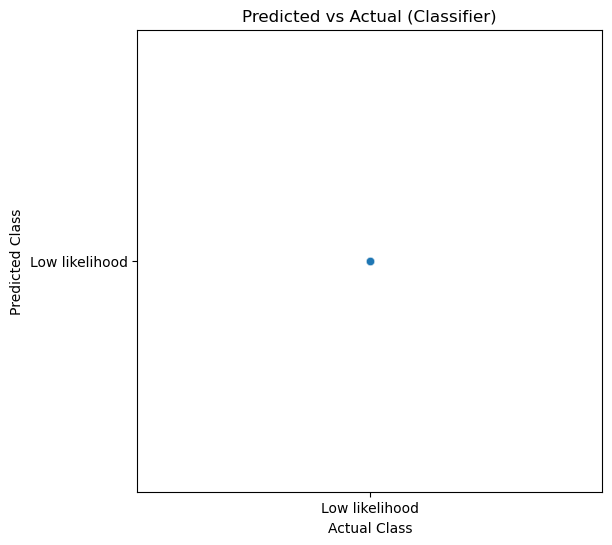

In [18]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_GNB, y=gnb_predictions, alpha=0.6)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.title("Predicted vs Actual (Classifier)")
plt.show()


100% accuracy??? Surprising...

*****
Next, I want to try out the models in the Ensembles section of scikit learn docs. Here they talk about how ensemble methods combine the predictions of several base estimators using a given learning algorithm, and it improves generalizability.   

In addition, histogram gradient boosting classifier algorithm can handle categorical data natively, which means I can leave in categorical data and not have to mess with the dataset to prepare it for the model. 


https://scikit-learn.org/stable/modules/ensemble.html
*****

Histogram Based Gradient Boosting: Requires classifications (categorical) so I will have to use the same data format as the naive bayes one for this specifically

In [19]:
#need to split up the data and classify it based on win percentage ranges 
def classify_more_specific_win_percentage(win_pct):
    if win_pct < 40:
        return 'not likely'
    elif 40 <= win_pct < 60:
        return 'even likelihood'
    elif 60 <= win_pct < 70:
        return 'likely'
    else:
        return 'very likely'

In [20]:
histogram_heroes_df = hero_data.copy()
histogram_heroes_df['Win_Likelihood'] = histogram_heroes_df['matchesWinPct_value'].apply(classify_more_specific_win_percentage)
histogram_heroes_df

,player_id,hero_name,role,timePlayed_value,matchesWinPct_value,matchesPlayed_value,kdRatio_value,kdaRatio_value,totalHeroDamagePerMinute_value,totalHeroHealPerMinute_value,...,Spider-Islands,Symbiotic Surface,Yggdrasill Path,Convergence,Convoy,Domination,role_strategist,role_duelist,role_vanguard,Win_Likelihood
0,VP Sypeh,Gambit,strategist,10.385762,0.691358,48.6,4.075556,9.626667,881.0,2983.0,...,56.461653,56.461653,56.461653,1.000000,1.000000,0.000000,1,0,0,not likely
1,VP Sypeh,Invisible Woman,strategist,4.102634,0.639344,18.3,4.962500,11.475000,1294.0,3169.0,...,1.000000,1.000000,56.461653,0.666667,1.000000,0.714286,1,0,0,not likely
2,VP Sypeh,Emma Frost,vanguard,0.354180,0.714286,1.4,3.363636,4.545455,2404.0,0.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,56.461653,0,0,1,not likely
3,VP Sypeh,Loki,strategist,1.963736,0.932203,11.8,5.400000,13.400000,957.0,2267.0,...,56.461653,1.000000,1.000000,1.000000,1.000000,1.000000,1,0,0,not likely
4,VP Sypeh,Adam Warlock,strategist,0.615783,0.533333,3.0,2.750000,4.850000,1272.0,1596.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,1.000000,1,0,0,not likely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,DecaDonald,Loki,strategist,10.502265,0.572016,48.6,2.886207,7.500000,701.0,2287.0,...,56.461653,56.461653,1.000000,1.000000,1.000000,0.000000,1,0,0,not likely
3953,DecaDonald,Invisible Woman,strategist,2.657516,0.336283,11.3,2.098901,5.571429,677.0,2592.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,0.000000,1,0,0,not likely
3954,DecaDonald,Rocket Raccoon,strategist,3.638904,0.590674,19.3,1.400000,6.410526,207.0,1988.0,...,56.461653,56.461653,56.461653,0.000000,56.461653,1.000000,1,0,0,not likely
3955,DecaDonald,Venom,vanguard,0.448317,0.400000,2.5,2.117647,2.941176,1095.0,0.0,...,56.461653,56.461653,56.461653,56.461653,56.461653,1.000000,0,0,1,not likely


In [21]:
#set the y train and y test for histogram based classification
y_train_hist = y_train.apply(classify_more_specific_win_percentage)
y_test_hist = y_test.apply(classify_more_specific_win_percentage)

In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier
#.ravel() is used to convert y_train from a 2D array to a 1D array, necessary a lot in ML libraries

#for this i dont need to scale the data, the algorithm works without it
clf = HistGradientBoostingClassifier(max_iter=300).fit(X_train, y_train_hist)
clf_prediction = clf.predict(X_test)

clf.score(X_test, y_test_hist)


1.0

In [23]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(max_iter=100).fit(X_train, y_train)
hgb_prediction = hgb.predict(X_test)
hgb.score(X_test, y_test)

0.39701859120695115

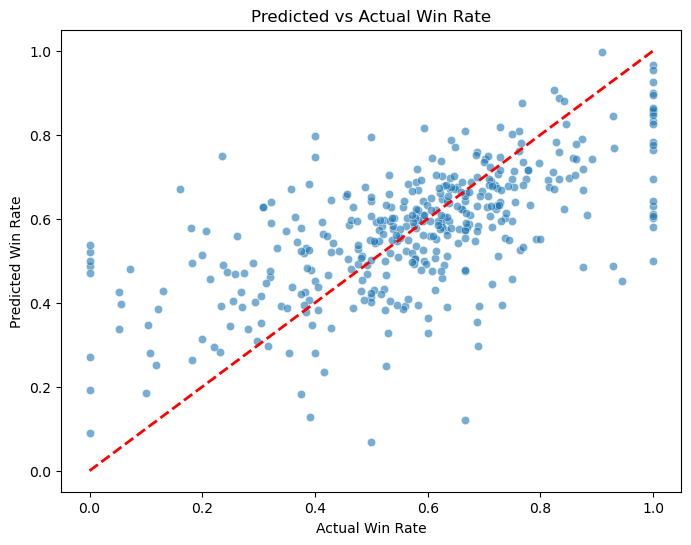

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=hgb_prediction, alpha=0.6)

#reference line 
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Win Rate")
plt.ylabel("Predicted Win Rate")
plt.title("Predicted vs Actual Win Rate")
plt.show()


In [25]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=None)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.40457532932828977

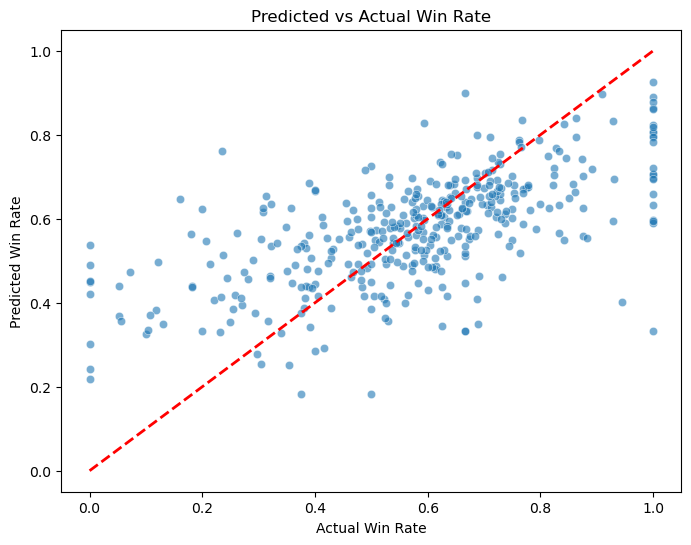

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rfc_prediction, alpha=0.6)

#reference line 
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Win Rate")
plt.ylabel("Predicted Win Rate")
plt.title("Predicted vs Actual Win Rate")
plt.show()
